In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy

import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

#Import the time Module
import time

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e93463a312d9bbbd41e00fe179c78cdd


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | xuddur
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 6 of Set 1 | whitianga
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | vesoul
Processing Record 9 of Set 1 | frontera comalapa
Processing Record 10 of Set 1 | saint-philippe
Processing Record 11 of Set 1 | geraldton
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | esperance
Processing Record 14 of Set 1 | makakilo city
Processing Record 15 of Set 1 | valparaiso
Processing Record 16 of Set 1 | broome
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | sonoita
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | ahipara
Processing Record 22 of Set 1 | rikitea
Processing R

Processing Record 36 of Set 4 | coahuayana
Processing Record 37 of Set 4 | nhulunbuy
Processing Record 38 of Set 4 | tual
Processing Record 39 of Set 4 | sechura
Processing Record 40 of Set 4 | jamai
Processing Record 41 of Set 4 | cabo rojo
Processing Record 42 of Set 4 | dongsheng
Processing Record 43 of Set 4 | gurupa
Processing Record 44 of Set 4 | katubao
Processing Record 45 of Set 4 | comodoro rivadavia
Processing Record 46 of Set 4 | pangnirtung
Processing Record 47 of Set 4 | san quintin
Processing Record 48 of Set 4 | vostok
Processing Record 49 of Set 4 | katakwi
Processing Record 50 of Set 4 | pacific grove
Processing Record 1 of Set 5 | hualmay
Processing Record 2 of Set 5 | haines junction
Processing Record 3 of Set 5 | castro
Processing Record 4 of Set 5 | cockburn town
Processing Record 5 of Set 5 | ye
City not found. Skipping...
Processing Record 6 of Set 5 | reefton
City not found. Skipping...
Processing Record 7 of Set 5 | monrovia
Processing Record 8 of Set 5 | niko

Processing Record 23 of Set 8 | niihama
Processing Record 24 of Set 8 | canico
Processing Record 25 of Set 8 | curuguaty
Processing Record 26 of Set 8 | aleksandrov gay
Processing Record 27 of Set 8 | payo
Processing Record 28 of Set 8 | ghoti
Processing Record 29 of Set 8 | los algarrobos
Processing Record 30 of Set 8 | montes claros
Processing Record 31 of Set 8 | portland
Processing Record 32 of Set 8 | encruzilhada do sul
Processing Record 33 of Set 8 | port hedland
Processing Record 34 of Set 8 | san miguel
Processing Record 35 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 36 of Set 8 | tadine
Processing Record 37 of Set 8 | yokadouma
Processing Record 38 of Set 8 | mala
Processing Record 39 of Set 8 | adeje
Processing Record 40 of Set 8 | abu kamal
Processing Record 41 of Set 8 | norman wells
Processing Record 42 of Set 8 | lagoa
Processing Record 43 of Set 8 | cap malheureux
Processing Record 44 of Set 8 | baraki barak
Processing Record 45 of Set 8 | bin

Processing Record 13 of Set 12 | ossora
Processing Record 14 of Set 12 | lucapa
Processing Record 15 of Set 12 | coari
Processing Record 16 of Set 12 | mawlaik
Processing Record 17 of Set 12 | sistranda
Processing Record 18 of Set 12 | collie
Processing Record 19 of Set 12 | bibiani
Processing Record 20 of Set 12 | owando
Processing Record 21 of Set 12 | bumba
Processing Record 22 of Set 12 | dragoman
Processing Record 23 of Set 12 | las palmas
Processing Record 24 of Set 12 | auki
Processing Record 25 of Set 12 | rawah
Processing Record 26 of Set 12 | martyush
Processing Record 27 of Set 12 | gobabis
Processing Record 28 of Set 12 | punta
Processing Record 29 of Set 12 | guerrero negro
Processing Record 30 of Set 12 | maragogi
Processing Record 31 of Set 12 | jinxiang
Processing Record 32 of Set 12 | mecca
Processing Record 33 of Set 12 | kaduqli
Processing Record 34 of Set 12 | port blair
Processing Record 35 of Set 12 | spermezeu
Processing Record 36 of Set 12 | el balyana
City not 

In [7]:
len(city_data)

553

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ribeira Grande,38.52,-28.70,71.60,88,40,18.34,PT,2020-10-31 17:32:54
1,Georgetown,5.41,100.34,78.01,94,40,3.36,MY,2020-10-31 17:30:01
2,Xuddur,4.12,43.89,75.33,79,31,8.43,SO,2020-10-31 17:38:48
3,Ushuaia,-54.80,-68.30,55.40,58,75,5.82,AR,2020-10-31 17:27:55
4,Petropavlovsk-Kamchatskiy,53.05,158.65,41.00,60,40,15.66,RU,2020-10-31 17:38:48
5,Whitianga,-36.83,175.70,59.00,96,57,4.00,NZ,2020-10-31 17:38:23
6,Mataura,-46.19,168.86,46.99,81,3,5.01,NZ,2020-10-31 17:32:37
7,Vesoul,47.58,5.83,51.80,93,0,2.24,FR,2020-10-31 17:38:49
8,Frontera Comalapa,15.65,-92.13,80.82,61,40,2.57,MX,2020-10-31 17:38:49
9,Saint-Philippe,-21.36,55.77,68.00,64,0,5.82,RE,2020-10-31 17:32:43


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ribeira Grande,PT,2020-10-31 17:32:54,38.52,-28.70,71.60,88,40,18.34
1,Georgetown,MY,2020-10-31 17:30:01,5.41,100.34,78.01,94,40,3.36
2,Xuddur,SO,2020-10-31 17:38:48,4.12,43.89,75.33,79,31,8.43
3,Ushuaia,AR,2020-10-31 17:27:55,-54.80,-68.30,55.40,58,75,5.82
4,Petropavlovsk-Kamchatskiy,RU,2020-10-31 17:38:48,53.05,158.65,41.00,60,40,15.66


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

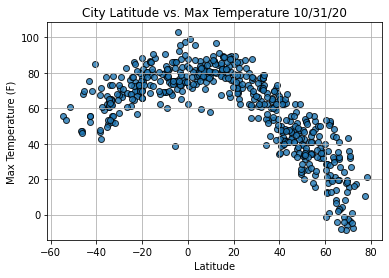

In [12]:
# Get today's time in seconds
today = time.time()

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

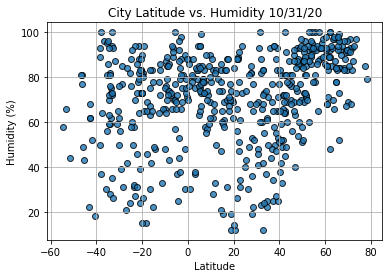

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

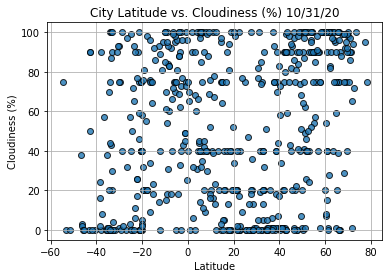

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

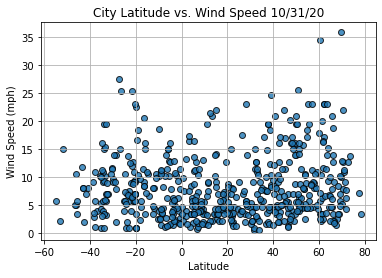

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
# present all the information at index 13 of the city_data_df DataFrame
index13 = city_data_df.loc[13]
index13

City                Makakilo City
Country                        US
Date          2020-10-31 17:33:37
Lat                         21.35
Lng                       -158.09
Max Temp                     71.6
Humidity                       88
Cloudiness                     20
Wind Speed                    4.7
Name: 13, dtype: object

In [19]:
# get all Northern Hemisphere latitudes, for latitudes greater than or equal to 0, we can filter the
# city_data_df DataFrame using the code 
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4       True
       ...  
548     True
549    False
550     True
551    False
552     True
Name: Lat, Length: 553, dtype: bool

In [20]:
# return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0, we can use 
# the loc method on the city_data_df DataFrame.
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ribeira Grande,PT,2020-10-31 17:32:54,38.52,-28.70,71.60,88,40,18.34
1,Georgetown,MY,2020-10-31 17:30:01,5.41,100.34,78.01,94,40,3.36
2,Xuddur,SO,2020-10-31 17:38:48,4.12,43.89,75.33,79,31,8.43
4,Petropavlovsk-Kamchatskiy,RU,2020-10-31 17:38:48,53.05,158.65,41.00,60,40,15.66
7,Vesoul,FR,2020-10-31 17:38:49,47.58,5.83,51.80,93,0,2.24


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

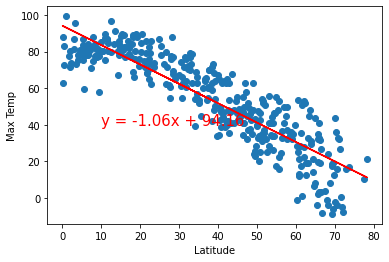

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

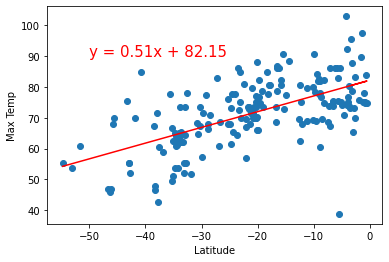

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

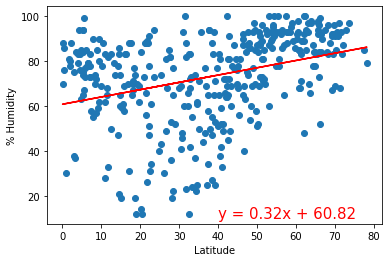

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

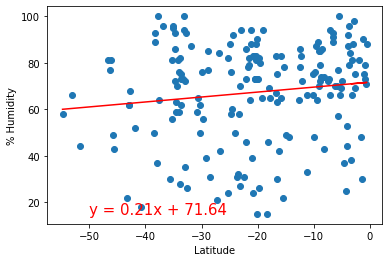

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

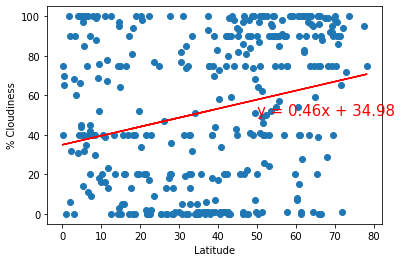

In [31]:
# Linear regression on the Norhern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness', (50, 50))

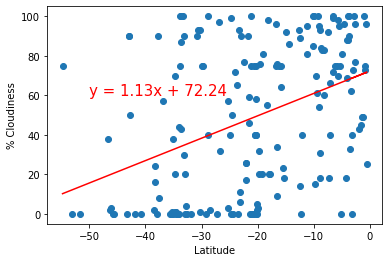

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

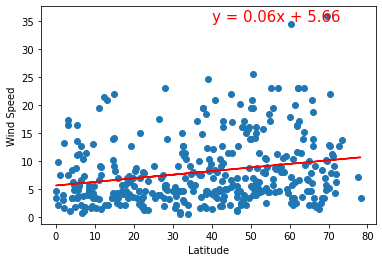

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

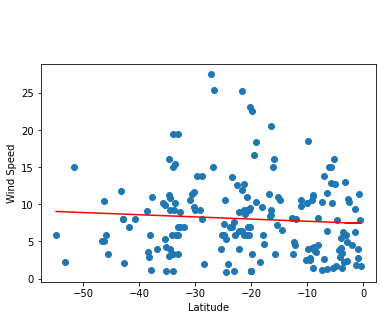

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))